In [72]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

<h1> Partie 1 : Préparation des données  </h1>

In [73]:
# importation des donées
car_file='cars.xls'
datafile = pd.read_excel(car_file)
print(datafile)

                 MODELE   PRIX  CYLINDREE  PUISSANCE  POIDS  CONSOMMATION
0        Daihatsu Cuore  11600        846         32    650           5.7
1   Suzuki Swift 1.0 GL  12490        993         39    790           5.8
2    Fiat Panda Mambo L  10450        899         29    730           6.1
3        VW Polo 1.4 60  17140       1390         44    955           6.5
4   Opel Corsa 1.2i Eco  14825       1195         33    895           6.8
5      Subaru Vivio 4WD  13730        658         32    740           6.8
6        Toyota Corolla  19490       1331         55   1010           7.1
7   Opel Astra 1.6i 16V  25000       1597         74   1080           7.4
8    Peugeot 306 XS 108  22350       1761         74   1100           9.0
9   Renault Safrane 2.2  36600       2165        101   1500          11.7
10   Seat Ibiza 2.0 GTI  22500       1983         85   1075           9.5
11      VW Golt 2.0 GTI  31580       1984         85   1155           9.5
12   Citroen ZX Volcane  28750       1

In [90]:
# dimension - nombre d'observation
# nombre d'observation
n=datafile.shape[0]
p=datafile.shape[1]

datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MODELE        27 non-null     object 
 1   PRIX          27 non-null     int64  
 2   CYLINDREE     27 non-null     int64  
 3   PUISSANCE     27 non-null     int64  
 4   POIDS         27 non-null     int64  
 5   CONSOMMATION  27 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.4+ KB


<h2> Transformation de données en données centrées réduites </h2>

In [80]:
# Z Tableau de données Centrée réduites
Z = []
for i in range(26):
    Z.append(datafile.values[i][1:6])
sc = StandardScaler().fit_transform(Z)
print(sc)

[[-1.33429949 -1.50021892 -1.41128185 -1.73303054 -1.53814597]
 [-1.25938304 -1.26315617 -1.1885123  -1.2740832  -1.49142659]
 [-1.43110164 -1.41474732 -1.50675452 -1.47077492 -1.35126843]
 [-0.86796565 -0.62292548 -1.02939119 -0.73318098 -1.16439088]
 [-1.06283259 -0.93739648 -1.37945763 -0.9298727  -1.02423272]
 [-1.15500507 -1.80340121 -1.41128185 -1.43799297 -1.02423272]
 [-0.67015255 -0.71807312 -0.67932474 -0.55288024 -0.88407455]
 [-0.20634398 -0.28910243 -0.07466452 -0.32340657 -0.74391639]
 [-0.42940981 -0.02462426 -0.07466452 -0.25784267  0.0035938 ]
 [ 0.77009511  0.62689514  0.78458948  1.05343545  1.26501725]
 [-0.41678344  0.33338887  0.27540192 -0.33979755  0.23719073]
 [ 0.34753267  0.33500155  0.27540192 -0.07754193  0.23719073]
 [ 0.10931521  0.35757895  0.40269881 -0.12671486 -0.08984498]
 [-0.40836587 -0.31651785 -0.36108252 -0.32340657  0.14375196]
 [-0.60197017 -0.62292548 -0.71114897 -0.22506071 -0.18328375]
 [-0.63564048 -0.61324945 -0.3292583  -0.12671486 -0.60

<h1> Partie 2 : Analyse en composantes principales </h1>

<h3> Instanciation et lancement des calculs </h3>

In [93]:
ACP=PCA(svd_solver='full')
# calculs
coord = ACP.fit_transform(Z)
# nombre de composantes calculées
print(ACP.n_components_)

5


<h3> Calcule des valeurs propres λ, composante principale </h3>

In [94]:
# variances expliquée
valeur_propre = ACP.explained_variance_
print(valeur_propre)

[1.47203823e+08 6.13832102e+04 9.75204569e+03 7.41084434e+01
 3.36605811e-01]


<h3> La Deuxième composante accapare porte la plus d'information 90 % </h3>

In [102]:
print(ACP.explained_variance_ratio_)

[9.99516485e-01 4.16793051e-04 6.62165577e-05 5.03197603e-07
 2.28555924e-09]


<h1>Partie 3 : Représentation Graphique  </h1>

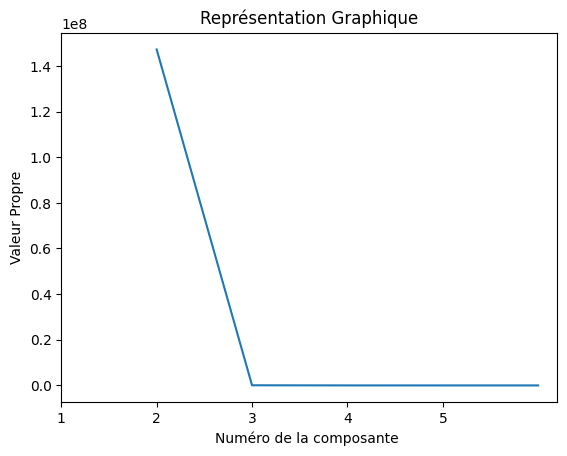

In [103]:
# screen plot
x = [1, 2, 3 ,4 ,5]
plt.plot(x ,valeur_propre)
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.title("Représentation Graphique")
plt.ylabel("Valeur Propre")
plt.xlabel("Numéro de la composante ")
plt.show()